In [226]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt

#### Extracting data

In [228]:
users_data = pd.read_excel('./zomato_data/users.xlsx')
users_data.head(10)

,user_id,name,Age,Gender,Marital Status,Occupation
0,1,Claire Ferguson,20,Female,Single,Student
1,2,Jennifer Young,24,Female,Single,Student
2,3,Jermaine Roberson,22,Male,Single,Student
3,4,Rachel Carpenter,22,Female,Single,Student
4,5,Shawn Parker,22,Male,Single,Student
5,6,Timothy Clark,27,Female,Married,Employee
6,7,Alexander Lucas,22,Male,Single,Student
7,8,Christopher Curry,24,Female,Single,Student
8,9,Daniel Mercado,23,Female,Single,Student
9,10,Tony Lawrence,23,Female,Single,Student


In [229]:
restaurants_data = pd.read_excel('./zomato_data/restaurant.xlsx')
restaurants_data.head(10)

,id,name,Country,city,rating,rating_count,cuisine,link,address
0,567335,AB FOODS POINT,India,Abohar,--,Too Few Ratings,"Beverages,Pizzas",https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI..."
1,531342,Janta Sweet House,India,Abohar,4.4,50+ ratings,"Sweets,Bakery",https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,..."
2,158203,theka coffee desi,India,Abohar,3.8,100+ ratings,Beverages,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city"
3,187912,Singh Hut,India,Abohar,3.7,20+ ratings,"Fast Food,Indian",https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR"
4,543530,GRILL MASTERS,India,Abohar,--,Too Few Ratings,"Italian-American,Fast Food",https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga..."
5,158204,Sam Uncle,India,Abohar,3.6,20+ ratings,Continental,https://www.swiggy.com/restaurants/sam-uncle-c...,"Sam Uncle, hanumangarh road near raja bajaj sh..."
6,156588,shere punjab veg,India,Abohar,4,100+ ratings,North Indian,https://www.swiggy.com/restaurants/shere-punja...,"shere punjab veg, major surinder chowk near ve..."
7,244866,Shri Balaji Vaishno Dhaba,India,Abohar,--,Too Few Ratings,North Indian,https://www.swiggy.com/restaurants/shri-balaji...,"Shri Balaji Vaishno Dhaba, St no 13,6th chowk,..."
8,156602,Hinglaj Kachori Bhandhar,India,Abohar,4.2,20+ ratings,"Snacks,Chaat",https://www.swiggy.com/restaurants/hinglaj-kac...,"Hinglaj Kachori Bhandhar, street no 11 circula..."
9,158193,yummy hub,India,Abohar,--,Too Few Ratings,Indian,https://www.swiggy.com/restaurants/yummy-hub-c...,"yummy hub, hanumangarh road near dr naveen set..."


In [230]:
orders_data = pd.read_excel('./zomato_data/orders.xlsx')
orders_data.head(10)

,order_date,sales_qty,sales_amount,currency,user_id,r_id
0,2017-10-10,100,41241,INR,49226,567335.0
1,2018-05-08,3,-1,INR,77359,531342.0
2,2018-04-06,1,875,INR,5321,158203.0
3,2018-04-11,1,583,INR,21343,187912.0
4,2018-06-18,6,7176,INR,75378,543530.0
5,2017-11-20,59,500,INR,34323,158204.0
6,2017-11-22,36,250,INR,33246,156588.0
7,2017-11-23,39,21412,INR,87420,244866.0
8,2017-11-27,35,19213,INR,31017,156602.0
9,2017-11-28,310,170185,INR,72391,158193.0


In [231]:
orders_type_data = pd.read_excel('./zomato_data/orders_type.xlsx')
orders_type_data.head(10)

,Order_Id,Type
0,B496840219,Non-Veg
1,C134461623,Other
2,D679770099,Other
3,E622201871,Veg
4,A980473889,Non-Veg
5,A177128356,Non-Veg
6,B425554799,Other
7,B488690926,Non-Veg
8,D532246305,Veg
9,E447012005,Veg


In [232]:
menu_data = pd.read_excel('./zomato_data/menu.xlsx')
menu_data.head(10)

,menu_id,r_id,f_id,cuisine,price
0,mn0,567335,fd0,"Beverages,Pizzas",40.0
1,mn0,567335,fd669322,"Beverages,Pizzas",40.0
2,mn328,158203,fd0,Beverages,65.0
3,mn328,158203,fd669322,Beverages,65.0
4,mn449,158203,fd0,Beverages,65.0
5,mn449,158203,fd669322,Beverages,65.0
6,mn729,158204,fd0,Continental,60.0
7,mn729,158204,fd669322,Continental,60.0
8,mn755,158204,fd0,Continental,60.0
9,mn755,158204,fd669322,Continental,60.0


In [233]:
food_data = pd.read_excel('./zomato_data/food.xlsx')
food_data.head(10)

,f_id,item,veg_or_non_veg
0,fd0,Aloo Tikki Burger,Veg
1,fd1,Veg Creamy Burger,Veg
2,fd2,Cheese Burst Burger,Veg
3,fd3,Paneer Creamy Burger,Veg
4,fd4,Maxican Burger,Veg
5,fd5,Bbq Chicken Burger,Non-veg
6,fd6,Peri Peri Chicken Burger,Non-veg
7,fd7,White Sauce,Veg
8,fd8,Red Sauce,Veg
9,fd9,Pink Sauce,Veg


#### Cleaning users_data table

In [235]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         100000 non-null  int64 
 1   name            100000 non-null  object
 2   Age             100000 non-null  int64 
 3   Gender          100000 non-null  object
 4   Marital Status  100000 non-null  object
 5   Occupation      100000 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.6+ MB


In [236]:
users_data.isnull().sum()

user_id           0
name              0
Age               0
Gender            0
Marital Status    0
Occupation        0
dtype: int64

In [237]:
users_data.user_id.unique()

array([     1,      2,      3, ...,  99998,  99999, 100000], dtype=int64)

In [238]:
users_data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [239]:
users_data.Age.unique()

array([20, 24, 22, 27, 23, 21, 28, 25, 32, 30, 31, 26, 18, 19, 33, 29],
      dtype=int64)

In [240]:
users_data['Marital Status'].unique()

array(['Single', 'Married', 'Prefer not to say'], dtype=object)

In [241]:
users_data.Occupation.unique()

array(['Student', 'Employee', 'Self Employeed', 'House wife'],
      dtype=object)

#### Cleaning restaurants_data table

In [243]:
restaurants_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148540 entries, 0 to 148539
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148540 non-null  int64 
 1   name          148454 non-null  object
 2   Country       148540 non-null  object
 3   city          148540 non-null  object
 4   rating        148454 non-null  object
 5   rating_count  148454 non-null  object
 6   cuisine       148441 non-null  object
 7   link          148540 non-null  object
 8   address       148454 non-null  object
dtypes: int64(1), object(8)
memory usage: 10.2+ MB


In [244]:
restaurants_data.size

1336860

In [245]:
restaurants_data.isnull().sum()

id               0
name            86
Country          0
city             0
rating          86
rating_count    86
cuisine         99
link             0
address         86
dtype: int64

In [246]:
restaurants_data = restaurants_data.dropna()

In [247]:
restaurants_data.size

1335969

In [248]:
restaurants_data.id.unique()

array([567335, 531342, 158203, ..., 559435, 418989, 447770], dtype=int64)

In [249]:
restaurants_data.Country.unique()

array(['India'], dtype=object)

In [250]:
restaurants_data.city.unique()

array(['Abohar', 'Adilabad', 'Adityapur', 'Adoni', 'Agartala', 'Agra',
       'Vastrapur,Ahmedabad', 'GOTA,Ahmedabad',
       'Paldi & Ambawadi,Ahmedabad', 'Ghatlodia,Ahmedabad',
       'Bopal,Ahmedabad', 'Gandhinagar,Ahmedabad', 'LalDarwaja,Ahmedabad',
       'Naranpura,Ahmedabad', 'Navrangpura,Ahmedabad',
       'Science City,Ahmedabad', 'Maninagar,Ahmedabad',
       'Chandkheda,Ahmedabad', 'Ahmednagar', 'Aizawl', 'Ajmer', 'Akola',
       'Alappuzha', 'Aligarh', 'Alipurduar', 'Allahabad', 'Alwar',
       'Ambala', 'Ambikapur', 'Ambur', 'Amravati', 'Amreli', 'Amritsar',
       'Anand', 'Anantapur', 'Ankleshwar', 'Arakkonam', 'Arambagh',
       'Arrah', 'Aruppukottai', 'Asansol', 'Aurangabad',
       'Aurangabad_bihar', 'Azamgarh', 'Baddi', 'Bagalkot', 'Bagdogra',
       'Bahadurgarh', 'Bahraich', 'Balaghat', 'Balangir', 'Balasore',
       'Ballari', 'Balrampur', 'Balurghat', 'Banda',
       'Yeshwanthpur,Bangalore', 'Geddalahalli,Bangalore',
       'Koramangala,Bangalore', 'JP Nagar,B

In [251]:
restaurants_data.rating.unique()

array(['--', 4.4, 3.8, 3.7, 3.6, 4, 4.2, 4.7, 4.1, 3.5, 3.1, 3.4, 3.3,
       4.8, 3.9, 2.7, 4.3, 2.9, 4.5, 2.5, 3.2, 2.4, 4.6, 3, 2.8, 2.3, 5,
       2.6, 2.2, 1.4, 1.9, 4.9, 2.1, 1.3, 2, 1.8, 1.6, 1.1, 1.5, 1, 1.2,
       1.7], dtype=object)

In [252]:
restaurants_data = restaurants_data.drop(restaurants_data[restaurants_data['rating'] == '--'].index)

In [253]:
restaurants_data

,id,name,Country,city,rating,rating_count,cuisine,link,address
1,531342,Janta Sweet House,India,Abohar,4.4,50+ ratings,"Sweets,Bakery",https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,..."
2,158203,theka coffee desi,India,Abohar,3.8,100+ ratings,Beverages,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city"
3,187912,Singh Hut,India,Abohar,3.7,20+ ratings,"Fast Food,Indian",https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR"
5,158204,Sam Uncle,India,Abohar,3.6,20+ ratings,Continental,https://www.swiggy.com/restaurants/sam-uncle-c...,"Sam Uncle, hanumangarh road near raja bajaj sh..."
6,156588,shere punjab veg,India,Abohar,4,100+ ratings,North Indian,https://www.swiggy.com/restaurants/shere-punja...,"shere punjab veg, major surinder chowk near ve..."
...,...,...,...,...,...,...,...,...,...
148499,185298,Jain Varities & Icecream Corner,India,Yavatmal,3.7,50+ ratings,"Snacks,Fast Food",https://www.swiggy.com/restaurants/jain-variti...,"Jain Varities & Icecream Corner, Naringe Nagar..."
148502,140164,Ranade Bandhu,India,Yavatmal,4.7,20+ ratings,"Sweets,Fast Food",https://www.swiggy.com/restaurants/ranade-band...,"Ranade Bandhu, Datta Chowk, Yavatmal"
148508,214598,Satkar Dinning Hall,India,Yavatmal,3.6,100+ ratings,"Maharashtrian,North Indian",https://www.swiggy.com/restaurants/satkar-dinn...,"Satkar Dinning Hall, Oswal market Chowk, Yavat..."
148515,140174,Suraj Hotel,India,Yavatmal,3,20+ ratings,"North Indian,Fast Food",https://www.swiggy.com/restaurants/suraj-hotel...,"Suraj Hotel, Darwha Rd, Lohara, MIDC, Yavatmal..."


In [254]:
restaurants_data.cuisine.unique()

array(['Sweets,Bakery', 'Beverages', 'Fast Food,Indian', ...,
       'Grill,North Indian', 'Chaat,Jain', 'South American,Andhra'],
      dtype=object)

In [255]:
restaurants_data.address.unique()

array(['Janta Sweet House, Bazar No.9, Circullar Road, Abohar',
       'theka coffee desi, sahtiya sadan road city',
       'Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR', ...,
       'Satkar Dinning Hall, Oswal market Chowk, Yavatmal, Maharashtra 445001, India',
       'Suraj Hotel, Darwha Rd, Lohara, MIDC, Yavatmal, Maharashtra 445001',
       'FOOD WORLD RESTAURANT, Tiranga Chowk, Pangari, Yavatmal, Maharashtra 445001'],
      dtype=object)

In [256]:
restaurants_data = restaurants_data.drop(['Country', 'address', 'link'], axis = 1)

In [257]:
restaurants_data['city'] = restaurants_data['city'].replace(['Vastrapur,Ahmedabad', 'GOTA,Ahmedabad',
       'Paldi & Ambawadi,Ahmedabad', 'Ghatlodia,Ahmedabad',
       'Bopal,Ahmedabad', 'Gandhinagar,Ahmedabad', 'LalDarwaja,Ahmedabad',
       'Naranpura,Ahmedabad', 'Navrangpura,Ahmedabad',
       'Science City,Ahmedabad', 'Maninagar,Ahmedabad',
       'Chandkheda,Ahmedabad'], 'Ahmedabad')

In [258]:
restaurants_data['city'] = restaurants_data['city'].replace(['Yeshwanthpur,Bangalore', 'Geddalahalli,Bangalore',
       'Koramangala,Bangalore', 'JP Nagar,Bangalore',
       'Mahadevpura,Bangalore', 'HSR,Bangalore', 'Arekere,Bangalore',
       'Indiranagar,Bangalore', 'Banashankari,Bangalore',
       'Whitefield,Bangalore', 'Nagavara & Hennur,Bangalore',
       'Kammanahalli/Kalyan Nagar,Bangalore',
       'Kumaraswamy Layout & Uttarahalli,Bangalore', 'BTM,Bangalore',
       'Battarahalli,Bangalore', 'Basaveshwaranagar,Bangalore',
       'Frazer Town,Bangalore', 'Sanjay Nagar, New BEL Road,Bangalore',
       'Yelahanka,Bangalore', 'Majestic,Bangalore',
       'Kanakapura Road,Bangalore', 'R.T. Nagar,Bangalore',
       'Kadugodi,Bangalore', 'Marathahalli,Bangalore',
       'Rajarajeshwari Nagar,Bangalore', 'CV Raman Nagar,Bangalore',
       'Electronic City,Bangalore', 'Rajajinagar,Bangalore',
       'Kadubeesanahalli,Bangalore', 'Shantinagar,Bangalore',
       'Jayanagar,Bangalore', 'Central Bangalore,Bangalore'], 'Bangalore')

In [259]:
restaurants_data['city'] = restaurants_data['city'].replace(['Greater Mohali,Chandigarh', 'Zirakpur,Chandigarh',
       'East Chd,Chandigarh', 'North Mohali,Chandigarh',
       'South Mohali,Chandigarh', 'West Chd,Chandigarh',
       'Panchkula,Chandigarh', 'South Chd,Chandigarh'], 'Chandigarh')

In [260]:
restaurants_data['city'] = restaurants_data['city'].replace(['Poonamallee,Chennai',
       'OMR Navalur,Chennai', 'Mylapore,Chennai', 'Guindy,Chennai',
       'Annanagar,Chennai', 'Chrompet,Chennai', 'Urapakkam,Chennai',
       'George Town,Chennai', 'KK Nagar,Chennai', 'OMR Perungudi,Chennai',
       'Kilpauk,Chennai', 'Vadapalani,Chennai', 'Perambur,Chennai',
       'Royapettah,Chennai', 'Tambaram,Chennai', 'Padur,Chennai',
       'Velachery,Chennai', 'Nungambakkam,Chennai', 'Avadi,Chennai',
       'Porur,Chennai', 'Ramapuram,Chennai', 'Perumbakkam,Chennai',
       'ECR-Kottivakkam,Chennai', 'Egmore,Chennai', 'Arumbakkam,Chennai',
       'Madipakkam,Chennai', 'Ambattur,Chennai',
       'Mahindra World City,Chennai', 'Alwarpet,Chennai',
       'Mogappair,Chennai', 'Iyyapanthangal,Chennai',
       'Medavakkam,Chennai', 'Villivakkam,Chennai', 'Karappakam,Chennai',
       'Royapuram,Chennai', 'Adyar,Chennai', 'T Nagar,Chennai',
       'Purasawalkam,Chennai'], 'Chennai')

In [261]:
restaurants_data['city'] = restaurants_data['city'].replace(['Peelamedu,Coimbatore', 'Hopes,Coimbatore',
       'Race Course,Coimbatore', 'Sai Baba Colony,Coimbatore',
       'Gandhipuram,Coimbatore', 'Saravanampatti,Coimbatore',
       'Ramanathapuram,Coimbatore', 'Coi_Ganapathy,Coimbatore'], 'Coimbatore')

In [262]:
restaurants_data['city'] = restaurants_data['city'].replace(['Chukkuwala,Dehradun', 'Hathibarkala,Dehradun',
       'Race Course Dehradun,Dehradun', 'Jakhan,Dehradun'], 'Dehradun')

In [263]:
restaurants_data['city'] = restaurants_data['city'].replace(['GTB Nagar,Delhi', 'Jasola,Delhi', 'Greater Noida,Delhi',
       'Mayur Vihar,Delhi', 'BBK_MayurVihar,Delhi', 'Laxmi Nagar,Delhi',
       'Punjabi Bagh,Delhi', 'Old Delhi,Delhi', 'Khan Market,Delhi',
       'Greater Kailash 2,Delhi', 'Ashok Vihar,Delhi',
       'Noida Expressway,Delhi', 'South Extension,Delhi',
       'Greater Kailash New,Delhi', 'Vasant Kunj,Delhi',
       'Uttam Nagar,Delhi', 'Dilshad Gardens,Delhi',
       'Connaught Place,Delhi', 'South Campus,Delhi', 'Rohini,Delhi',
       'BBK_Chattarpur,Delhi', 'Chattarpur,Delhi', 'Lajpat Nagar,Delhi',
       'Kirti Nagar,Delhi', 'Indirapuram,Delhi', 'Dwarka,Delhi',
       'Rajouri Garden,Delhi', 'NSP,Delhi', 'Malviya Nagar,Delhi',
       'Sector 18,Delhi'], 'Delhi')

In [264]:
restaurants_data['city'] = restaurants_data['city'].replace(['Greenfields_FBD,Gurgaon', 'Sector-14,Gurgaon',
       'Sector 15_FBD,Gurgaon', 'New DLF Phase 4,Gurgaon',
       'NIT_FBD,Gurgaon', 'New Sohna Road,Gurgaon',
       'Old Gurgaon (Zone 6),Gurgaon', 'sohna road,Gurgaon',
       'New Cyber City,Gurgaon'], 'Gurgaon')

In [265]:
restaurants_data['city'] = restaurants_data['city'].replace(['Paltan Bazaar,Guwahati',
       'Ganeshguri,Guwahati'], 'Guwahati')

In [266]:
restaurants_data['city'] = restaurants_data['city'].replace(['Kompally,Hyderabad', 'Himayath Nagar,Hyderabad',
       'Jubilee Hills,Hyderabad', 'Kachiguda,Hyderabad',
       'Begumpet,Hyderabad', 'Kothapet & Dilsukhnagar,Hyderabad',
       'Lingampally & Nalagandla,Hyderabad', 'Balanagar & Idpl,Hyderabad',
       'Kondapur,Hyderabad', 'Ameerpet,Hyderabad',
       'Abids & Koti,Hyderabad', 'Banjara Hills,Hyderabad',
       'Gachibowli,Hyderabad', 'Suncity & Bandlaguda,Hyderabad',
       'Vanasthalipuram,Hyderabad', 'Nampally,Hyderabad',
       'Miyapur,Hyderabad', 'Manikonda,Hyderabad', 'Madhapur,Hyderabad',
       'Mehdipatnam,Hyderabad', 'Kharkhana & Trimulgherry,Hyderabad',
       'West Marredpally,Hyderabad',
       'Tarnaka, Nacharam & Malkajigiri,Hyderabad',
       'Santoshnagar & Saidabad,Hyderabad', 'Alwal,Hyderabad',
       'Padmarao Nagar,Hyderabad', 'Kukatpally,Hyderabad',
       'Nizampet & Pragathi Nagar,Hyderabad', 'Tolichowki,Hyderabad',
       'Nanakramguda,Hyderabad', 'Attapur,Hyderabad'], 'Hyderabad')

In [267]:
restaurants_data['city'] = restaurants_data['city'].replace(['Sarafa,Indore', 'Vijay Nagar,Indore',
       'South Tukoganj,Indore', 'Bhawar Kuan,Indore',
       'Old Palasia,Indore', 'New Palasia,Indore'], 'Indore')

In [268]:
restaurants_data['city'] = restaurants_data['city'].replace(['Manasarovar,Jaipur'], 'Jaipur')

In [269]:
restaurants_data['city'] = restaurants_data['city'].replace(['Vyttila,Kochi', 'Kalamassery,Kochi',
       'Aluva,Kochi', 'Panampilly Nagar,Kochi', 'Lulu Mall,Kochi',
       'Fort Kochi,Kochi', 'Thrippunithura,Kochi'], 'Kochi')

In [270]:
restaurants_data['city'] = restaurants_data['city'].replace(['Howrah,Kolkata', 'South Kolkata,Kolkata',
       'Rajarhat,Kolkata', 'Burrabazar,Kolkata', 'North Dumdum,Kolkata',
       'Chinar Park,Kolkata', 'Kestopur,Kolkata', 'Kidderpore,Kolkata',
       'Salt Lake,Kolkata', 'Ruby Area,Kolkata', 'Santoshpur,Kolkata',
       'Bally,Kolkata', 'Central Kolkata,Kolkata', 'Garia,Kolkata',
       'Tangra,Kolkata', 'Esplanade,Kolkata', 'Kankurgachi,Kolkata',
       'Naktala,Kolkata', 'Behala,Kolkata', 'Alipore,Kolkata',
       'Lake Town,Kolkata', 'Dumdum,Kolkata', 'Jadavpur,Kolkata',
       'Thakurpukur,Kolkata', 'Hatibagan,Kolkata'], 'Kolkata')

In [271]:
restaurants_data['city'] = restaurants_data['city'].replace(['Lonavala', 'Lonavla'], 'Lonavala')

In [272]:
restaurants_data['city'] = restaurants_data['city'].replace(['Gomti Nagar,Lucknow', 'Hazratganj,Lucknow',
       'Bbd,Lucknow', 'Ashiyana,Lucknow', 'Aminabad,Lucknow',
       'Aliganj,Lucknow', 'Alambagh,Lucknow', 'Indira Nagar,Lucknow'], 'Lucknow')

In [273]:
restaurants_data['city'] = restaurants_data['city'].replace(['Civil Lines,Ludhiana', 'BRS Nagar,Ludhiana',
       'Model Town,Ludhiana', 'Dugri,Ludhiana'], 'Ludhiana')

In [274]:
restaurants_data['city'] = restaurants_data['city'].replace(['Virar,Mumbai',
       'Powai,Mumbai', 'Kamothe,Mumbai', 'Mulund,Mumbai',
       'Mahalaxmi Malabar Hill,Mumbai', 'Vashi,Mumbai',
       'Bandra West,Mumbai', 'Scruz Bandra East,Mumbai',
       'Fort Colaba,Mumbai', 'Bhayandar,Mumbai', 'Mahim Dadar,Mumbai',
       'Starbucks_BKC,Mumbai', 'Vasai,Mumbai', 'Matunga Wadala,Mumbai',
       'Airoli,Mumbai'], 'Mumbai')

In [275]:
restaurants_data['city'] = restaurants_data['city'].replace(['Mysore North,Mysore', 'Mysore South,Mysore'], 'Mysore')

In [276]:
restaurants_data['city'] = restaurants_data['city'].replace(['Dharampeth,Nagpur', 'Nandanvan,Nagpur', 'Sitabuldi,Nagpur',
       'Gandhibagh,Nagpur', 'Bajaj Nagar,Nagpur', 'Manish Nagar,Nagpur',
       'Sadar,Nagpur', 'Wardha Road,Nagpur'], 'Nagpur')

In [277]:
restaurants_data['city'] = restaurants_data['city'].replace(['Raj Nagar,Noida', 'Noida-1'], 'Noida')

In [278]:
restaurants_data['city'] = restaurants_data['city'].replace(['Wanowrie,Pune',
       'Koregaon Park,Pune', 'Hadapsar,Pune', 'Warje,Pune',
       'Pimple Saudagar,Pune', 'Kothrud,Pune', 'Vishrantwadi,Pune',
       'Sangvi,Pune', 'Bibwewadi,Pune', 'Wakad,Pune', 'Kondhwa,Pune',
       'Swargate,Pune', 'Nigdi,Pune', 'Bavdhan,Pune', 'Bhosari,Pune',
       'Sinhgad Road,Pune', 'Wagholi,Pune', 'Narhe,Pune',
       'Hinjewadi,Pune', 'Bopodi,Pune', 'PCMC,Pune', 'Dhankawadi,Pune',
       'Viman Nagar,Pune', 'Aundh,Pune', 'Kalyani Nagar,Pune',
       'Kharadi,Pune', 'Shivaji Nagar,Pune', 'Hinjewadi Phase-3,Pune',
       'Baner,Pune', 'Magarpatta,Pune'], 'Pune')

In [279]:
restaurants_data['city'] = restaurants_data['city'].replace(['Athwa,Surat', 'Adajan,Surat', 'Piplod,Surat'], 'Surat')

In [280]:
restaurants_data['city'] = restaurants_data['city'].replace(['Akota,Vadodara', 'Alkapuri,Vadodara', 'Vadiwadi,Vadodara'], 'Vadodara')

In [281]:
restaurants_data['city'] = restaurants_data['city'].replace(['Benz Circle and Auto Nagar,Vijayawada', 'Governorpet,Vijayawada'], 'Vijayawada')

In [282]:
restaurants_data['city'] = restaurants_data['city'].replace(['N A D,Vizag', 'Gajuwaka,Vizag', 'Jagadamba Junction,Vizag', 'MVP Colony,Vizag', 'Dwarka Nagar,Vizag'], 'Vizag')

In [283]:
conditions = [
    (restaurants_data.rating_count == 'Too Few Ratings'),
    (restaurants_data.rating_count == '20+ ratings'),
    (restaurants_data.rating_count == '50+ ratings'),
    (restaurants_data.rating_count == '100+ ratings'),
    (restaurants_data.rating_count == '500+ ratings'),
    (restaurants_data.rating_count == '1K+ ratings'),
    (restaurants_data.rating_count == '5K+ ratings'),
    (restaurants_data.rating_count == '10K+ ratings')
]

choices = ['1', '2', '3', '4', '5', '6', '7', '8']

restaurants_data.rating_count = np.select(conditions, choices, default = 'No rating')

In [284]:
restaurants_data.rating_count = restaurants_data.rating_count.astype(int)

In [285]:
restaurants_data.rating = restaurants_data.rating.astype(float)

In [286]:
restaurants_data.rating_count.unique()

array([3, 4, 2, 5, 6, 7, 8])

#### Cleaning orders_data table

In [288]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150281 entries, 0 to 150280
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_date    150281 non-null  datetime64[ns]
 1   sales_qty     150281 non-null  int64         
 2   sales_amount  150281 non-null  int64         
 3   currency      150281 non-null  object        
 4   user_id       150281 non-null  int64         
 5   r_id          148664 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.9+ MB


In [289]:
orders_data.size

901686

In [290]:
orders_data.isnull().sum()

order_date         0
sales_qty          0
sales_amount       0
currency           0
user_id            0
r_id            1617
dtype: int64

In [291]:
orders_data = orders_data.dropna()

In [292]:
orders_data.size

891984

In [293]:
orders_data.order_date.unique()

<DatetimeArray>
['2017-10-10 00:00:00', '2018-05-08 00:00:00', '2018-04-06 00:00:00',
 '2018-04-11 00:00:00', '2018-06-18 00:00:00', '2017-11-20 00:00:00',
 '2017-11-22 00:00:00', '2017-11-23 00:00:00', '2017-11-27 00:00:00',
 '2017-11-28 00:00:00',
 ...
 '2018-04-07 00:00:00', '2018-11-18 00:00:00', '2017-10-15 00:00:00',
 '2019-04-06 00:00:00', '2017-12-02 00:00:00', '2018-05-27 00:00:00',
 '2018-06-09 00:00:00', '2018-11-17 00:00:00', '2020-06-14 00:00:00',
 '2019-10-13 00:00:00']
Length: 806, dtype: datetime64[ns]

In [294]:
orders_data['month'] = orders_data['order_date'].dt.month.astype(int)
orders_data['year'] = orders_data['order_date'].dt.year.astype(int)

In [295]:
# orders_data['month'] = orders_data['order_date'].dt.strftime('%m')

In [296]:
orders_data = orders_data.drop(['order_date'], axis = 1)

In [297]:
orders_data.currency.unique()

array(['INR'], dtype=object)

In [298]:
orders_data = orders_data.drop(['currency'], axis = 1)

In [299]:
orders_data = orders_data.drop(orders_data.loc[orders_data.sales_amount < 0].index)

#### Cleaning orders_type table

In [301]:
orders_type_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150281 entries, 0 to 150280
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Order_Id  150281 non-null  object
 1   Type      150281 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [302]:
orders_type_data.size

300562

In [303]:
orders_type_data.isnull().sum()

Order_Id    0
Type        0
dtype: int64

In [304]:
orders_type_data.Type.unique()

array(['Non-Veg', 'Other', 'Veg'], dtype=object)

#### Cleaning menu_data table

In [306]:
menu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   menu_id  1048575 non-null  object 
 1   r_id     1048575 non-null  int64  
 2   f_id     1048575 non-null  object 
 3   cuisine  1048575 non-null  object 
 4   price    1048574 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 40.0+ MB


In [307]:
menu_data.size

5242875

In [308]:
menu_data.isnull().sum()

menu_id    0
r_id       0
f_id       0
cuisine    0
price      1
dtype: int64

In [309]:
menu_data = menu_data.dropna()

In [310]:
menu_data.size

5242870

In [311]:
menu_data.cuisine.unique()

array(['Beverages,Pizzas', 'Beverages', 'Continental', ...,
       'Indian, Chinese, Fast Food, Seafood', 'Sushi',
       'Oriya,North Indian'], dtype=object)

In [312]:
menu_data.price.unique()

array([  40.,   65.,   60., ..., 2170., 1139., 2130.])

#### Cleaning food_data table

In [314]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371560 entries, 0 to 371559
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   f_id            371552 non-null  object
 1   item            371552 non-null  object
 2   veg_or_non_veg  371552 non-null  object
dtypes: object(3)
memory usage: 8.5+ MB


In [315]:
food_data.size

1114680

In [316]:
food_data.isnull().sum()

f_id              8
item              8
veg_or_non_veg    8
dtype: int64

In [317]:
food_data = food_data.dropna()

In [318]:
food_data.size

1114656

In [319]:
food_data.item.unique()

array(['Aloo Tikki Burger', 'Veg Creamy Burger', 'Cheese Burst Burger',
       ..., 'Veg Sizzling Italian', 'Veg Overload  Sandwich',
       'Aglio Riso Rice Bowl'], dtype=object)

In [320]:
food_data.veg_or_non_veg.unique()

array(['Veg', 'Non-veg'], dtype=object)

#### Displaying all the updated tables

In [322]:
users_data.head(10)

,user_id,name,Age,Gender,Marital Status,Occupation
0,1,Claire Ferguson,20,Female,Single,Student
1,2,Jennifer Young,24,Female,Single,Student
2,3,Jermaine Roberson,22,Male,Single,Student
3,4,Rachel Carpenter,22,Female,Single,Student
4,5,Shawn Parker,22,Male,Single,Student
5,6,Timothy Clark,27,Female,Married,Employee
6,7,Alexander Lucas,22,Male,Single,Student
7,8,Christopher Curry,24,Female,Single,Student
8,9,Daniel Mercado,23,Female,Single,Student
9,10,Tony Lawrence,23,Female,Single,Student


In [323]:
restaurants_data.head(10)

,id,name,city,rating,rating_count,cuisine
1,531342,Janta Sweet House,Abohar,4.4,3,"Sweets,Bakery"
2,158203,theka coffee desi,Abohar,3.8,4,Beverages
3,187912,Singh Hut,Abohar,3.7,2,"Fast Food,Indian"
5,158204,Sam Uncle,Abohar,3.6,2,Continental
6,156588,shere punjab veg,Abohar,4.0,4,North Indian
8,156602,Hinglaj Kachori Bhandhar,Abohar,4.2,2,"Snacks,Chaat"
11,156590,Sethi Milk Badam,Abohar,4.2,2,"Sweets,Desserts"
14,156587,Bharawan Da Dhaba,Abohar,4.4,3,Indian
16,394554,Roll Express,Abohar,4.0,2,Fast Food
19,530909,FOODY MOOD,Abohar,4.7,2,"Fast Food,Chinese"


In [324]:
orders_data.head(10)

,sales_qty,sales_amount,user_id,r_id,month,year
0,100,41241,49226,567335.0,10,2017
2,1,875,5321,158203.0,4,2018
3,1,583,21343,187912.0,4,2018
4,6,7176,75378,543530.0,6,2018
5,59,500,34323,158204.0,11,2017
6,36,250,33246,156588.0,11,2017
7,39,21412,87420,244866.0,11,2017
8,35,19213,31017,156602.0,11,2017
9,310,170185,72391,158193.0,11,2017
10,184,101194,91457,407249.0,11,2017


In [325]:
orders_type_data.head(10)

,Order_Id,Type
0,B496840219,Non-Veg
1,C134461623,Other
2,D679770099,Other
3,E622201871,Veg
4,A980473889,Non-Veg
5,A177128356,Non-Veg
6,B425554799,Other
7,B488690926,Non-Veg
8,D532246305,Veg
9,E447012005,Veg


In [326]:
menu_data.head(10)

,menu_id,r_id,f_id,cuisine,price
0,mn0,567335,fd0,"Beverages,Pizzas",40.0
1,mn0,567335,fd669322,"Beverages,Pizzas",40.0
2,mn328,158203,fd0,Beverages,65.0
3,mn328,158203,fd669322,Beverages,65.0
4,mn449,158203,fd0,Beverages,65.0
5,mn449,158203,fd669322,Beverages,65.0
6,mn729,158204,fd0,Continental,60.0
7,mn729,158204,fd669322,Continental,60.0
8,mn755,158204,fd0,Continental,60.0
9,mn755,158204,fd669322,Continental,60.0


In [327]:
food_data.head(10)

,f_id,item,veg_or_non_veg
0,fd0,Aloo Tikki Burger,Veg
1,fd1,Veg Creamy Burger,Veg
2,fd2,Cheese Burst Burger,Veg
3,fd3,Paneer Creamy Burger,Veg
4,fd4,Maxican Burger,Veg
5,fd5,Bbq Chicken Burger,Non-veg
6,fd6,Peri Peri Chicken Burger,Non-veg
7,fd7,White Sauce,Veg
8,fd8,Red Sauce,Veg
9,fd9,Pink Sauce,Veg


#### Converting all files to excel

In [329]:
#users_data.to_excel('users_data.xlsx', index=False)

In [330]:
# restaurants_data.to_excel('restaurants_data.xlsx', index=False)

In [331]:
# orders_data.to_excel('orders_data.xlsx', index=False)

In [332]:
# orders_type_data.to_excel('orders_type_data.xlsx', index=False)

In [333]:
# menu_data.to_excel('menu_data.xlsx', index=False)

In [334]:
# food_data.to_excel('food_data.xlsx', index=False)

### Visualizations

#### Chart 1 - Age Distribution of Users

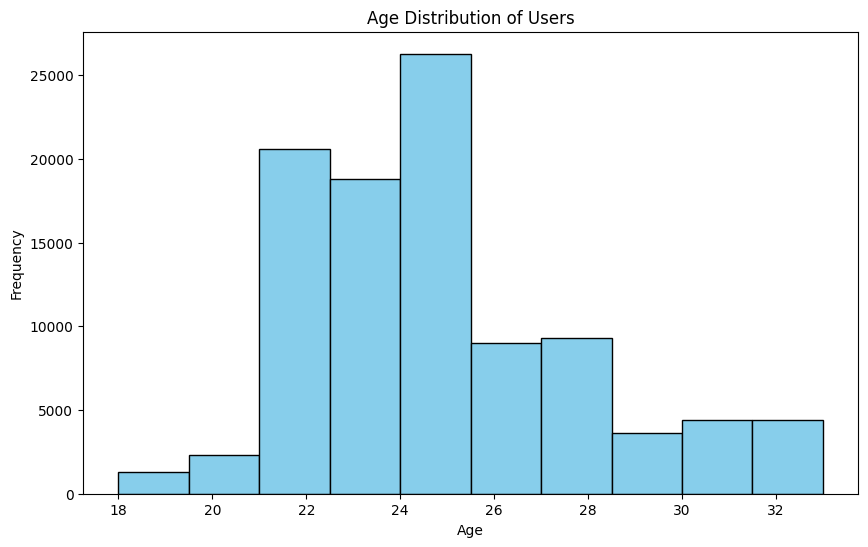

In [337]:
plt.figure(figsize=(10, 6))
plt.hist(users_data['Age'], bins = 10, color = 'skyblue', edgecolor = 'black')

plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

#### Chart 2 - Monthly Sales Trends

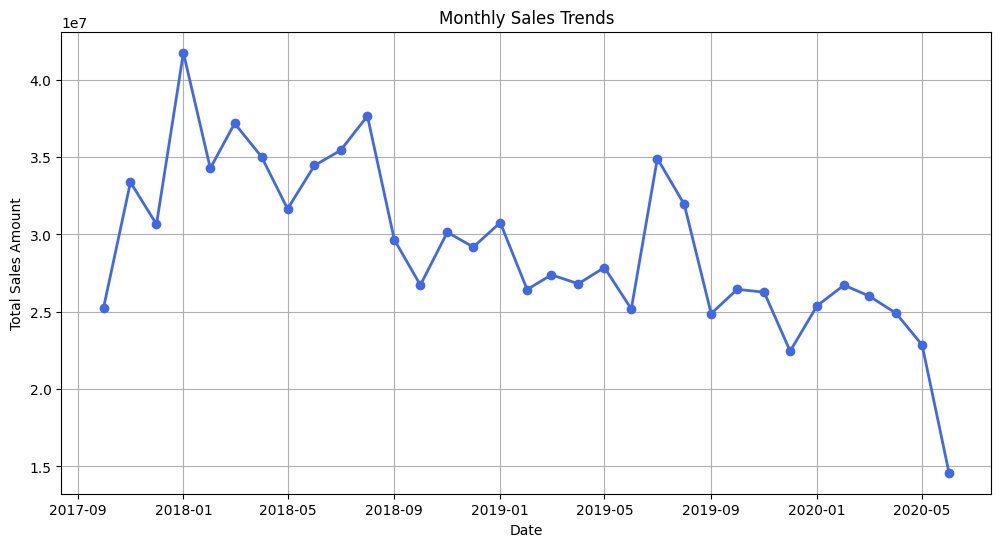

In [344]:
orders_data['date'] = pd.to_datetime(orders_data[['year', 'month']].assign(day=1))

monthly_sales = orders_data.groupby('date')['sales_amount'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='royalblue', linewidth=2)

plt.title("Monthly Sales Trends")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.grid(True)

plt.show()

#### Chart 3 - Order Type Distribution

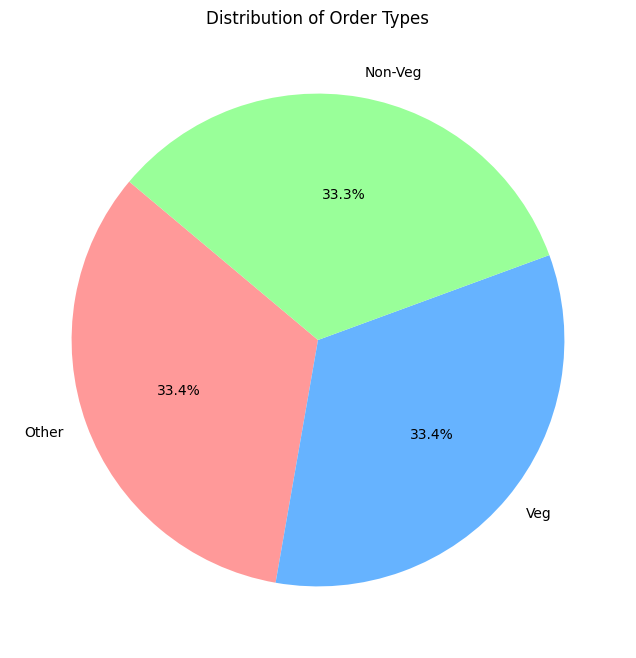

In [347]:
order_type_counts = orders_type_data['Type'].value_counts()

plt.figure(figsize=(8, 8))  
plt.pie(order_type_counts, labels=order_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Distribution of Order Types")
plt.show()

#### Chart 4 - Top Cuisines

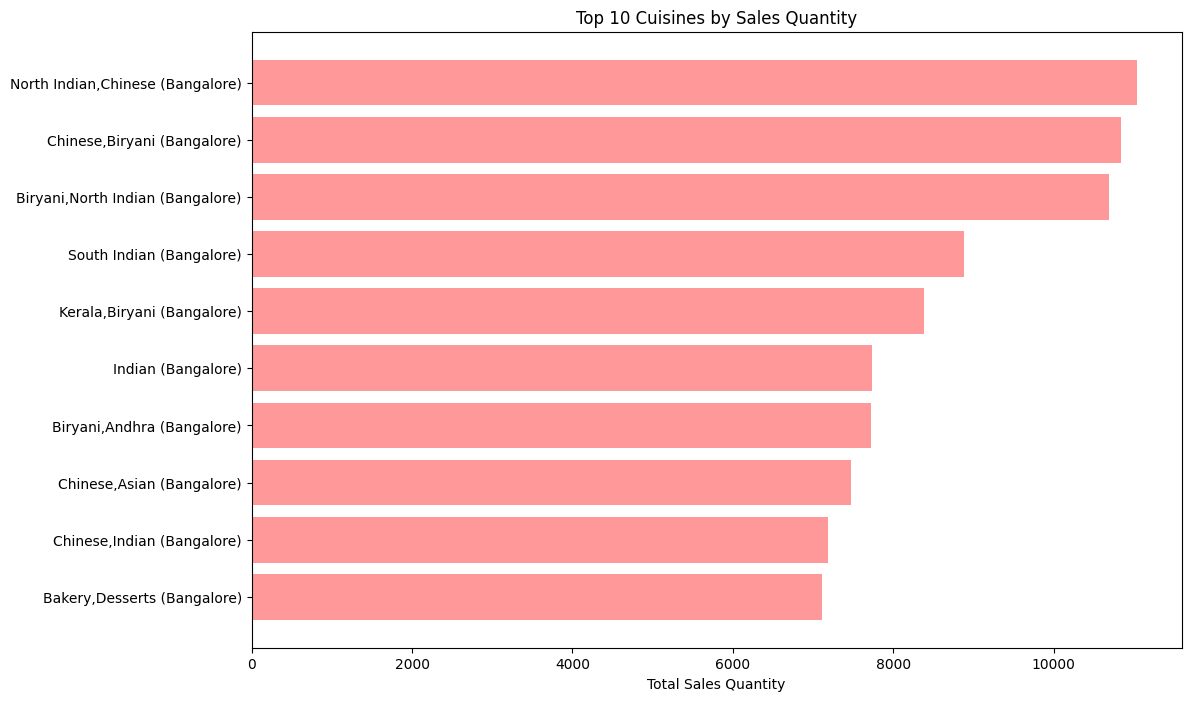

In [380]:
flattened_data = city_cuisine_sales.stack().reset_index()
flattened_data.columns = ['City', 'Cuisine', 'Sales Quantity']

top_10_cuisines = flattened_data.sort_values(by='Sales Quantity', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_10_cuisines['Cuisine'] + " (" + top_10_cuisines['City'] + ")", top_10_cuisines['Sales Quantity'], color='#ff9999')
plt.xlabel('Total Sales Quantity')
plt.title('Top 10 Cuisines by Sales Quantity')
plt.gca().invert_yaxis() 
plt.show()


#### Chart 5 -  Average Order Amount by User Occupation

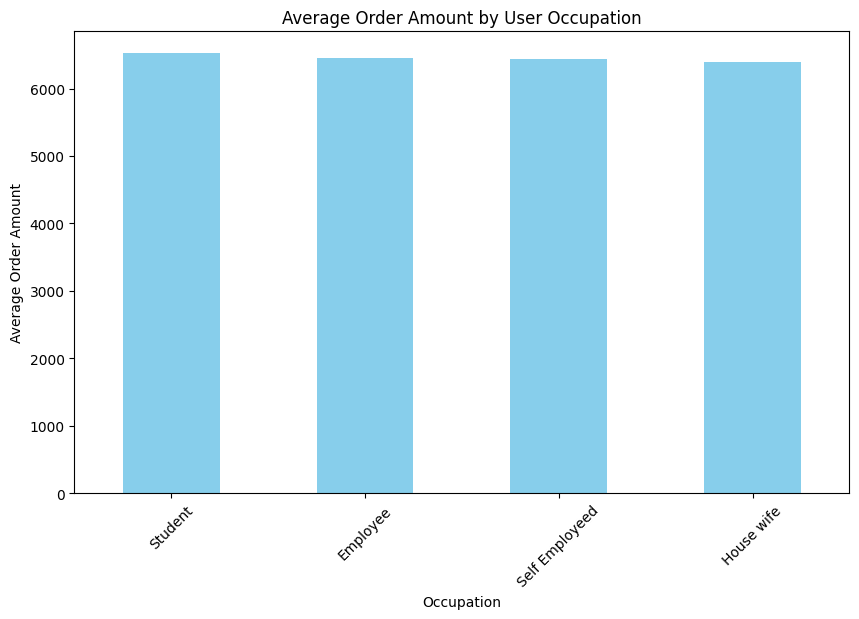

In [384]:
merged_data = pd.merge(users_data, orders_data, on='user_id', how='inner')

occupation_avg_order = merged_data.groupby('Occupation')['sales_amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
occupation_avg_order.plot(kind='bar', color='skyblue')
plt.xlabel('Occupation')
plt.ylabel('Average Order Amount')
plt.title('Average Order Amount by User Occupation')
plt.xticks(rotation=45)
plt.show()

#### Chart 6 - Vegetarian vs Non-Vegetarian preferences

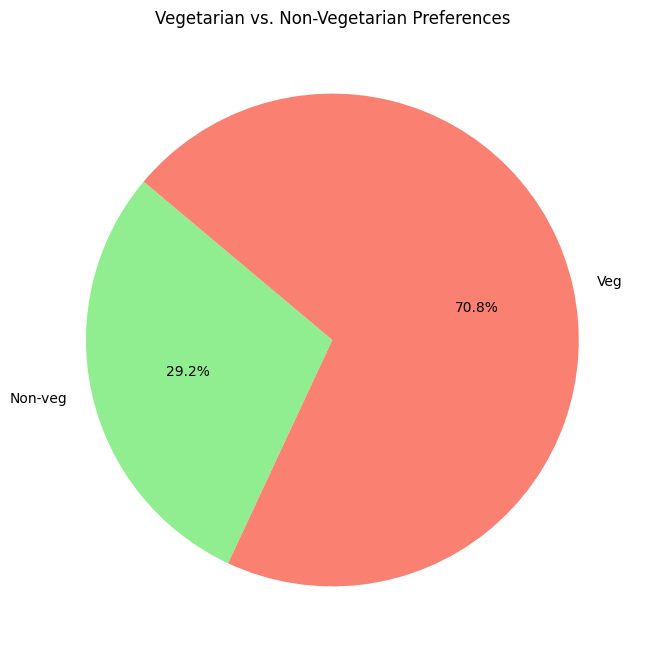

In [387]:
merged_data = pd.merge(orders_data, menu_data, on='r_id', how='inner')
merged_data = pd.merge(merged_data, food_data, on='f_id', how='inner')

veg_counts = merged_data.groupby('veg_or_non_veg')['sales_qty'].sum()

plt.figure(figsize=(8, 8))
plt.pie(veg_counts, labels=veg_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'salmon'])
plt.title('Vegetarian vs. Non-Vegetarian Preferences')
plt.show()

#### Chart 7 - Gender-wise Cuisine Preference

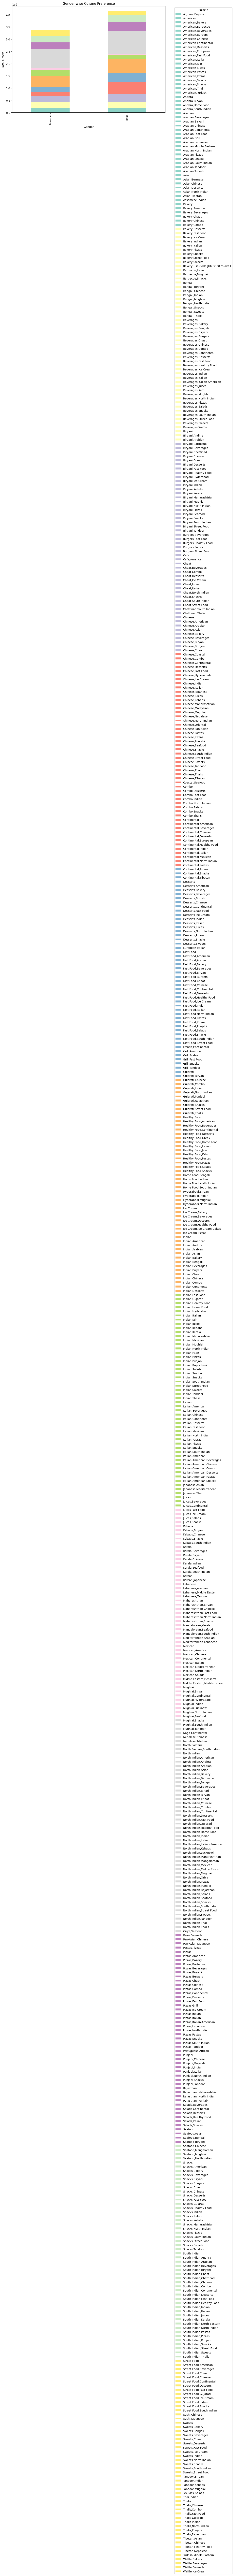

In [404]:
merged_data = pd.merge(users_data, orders_data, on='user_id')

merged_data = pd.merge(merged_data, menu_data, on='r_id')

merged_data = pd.merge(merged_data, restaurants_data, left_on='r_id', right_on='id')

gender_cuisine_counts = merged_data.groupby(['Gender', 'cuisine_y'])['sales_qty'].sum().unstack(fill_value=0)

gender_cuisine_counts.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='Set3')
plt.xlabel('Gender')
plt.ylabel('Total Orders')
plt.title('Gender-wise Cuisine Preference')
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()